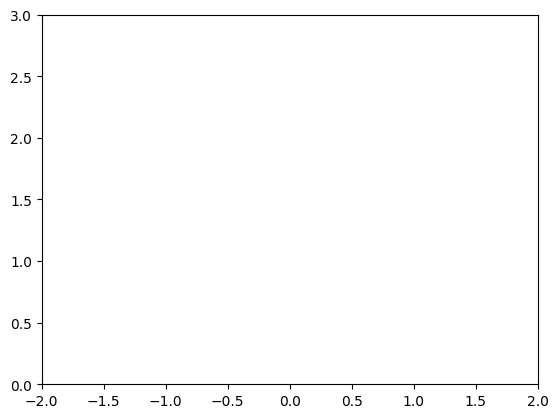

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fake gait coordinates hehehehe
frames = 50
t = np.linspace(0, 2*np.pi, frames)

# Sinosuidal motion para la demostracion
hip_x = np.zeros(frames)
hip_y = np.ones(frames) * 2

knee_x = np.sin(t) * 0.5
knee_y = 1.5 + 0.2 * np.cos(t)

ankle_x = np.sin(t)
ankle_y = 1.0 + 0.2 * np.cos(t)

# Setup plot
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(0, 3)

# Lines for thigh and shank
thigh, = ax.plot([], [], 'o-', lw=4, color='blue')
shank, = ax.plot([], [], 'o-', lw=4, color='green')

def init():
    thigh.set_data([], [])
    shank.set_data([], [])
    return thigh, shank

def update(frame):
    # Hip -> Knee
    thigh.set_data([hip_x[frame], knee_x[frame]],
                   [hip_y[frame], knee_y[frame]])
    # Knee -> Ankle
    shank.set_data([knee_x[frame], ankle_x[frame]],
                   [knee_y[frame], ankle_y[frame]])
    return thigh, shank

ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

ani.save("gait.gif", writer="pillow", fps=10) #aneeemation


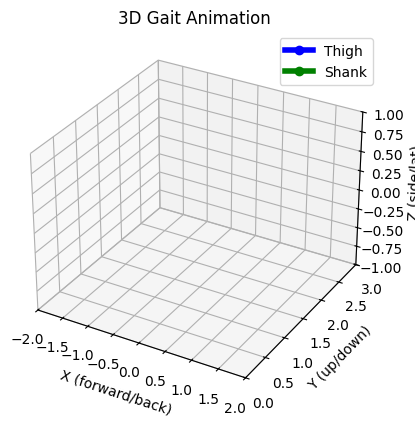

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# ---------------------------
# Parameters
# ---------------------------
frames = 50
t = np.linspace(0, 2*np.pi, frames)

# ---------------------------
# 3D Coordinates for Joints
# ---------------------------
# Pelvis/Hip
hip_x = np.zeros(frames)
hip_y = np.ones(frames) * 2
hip_z = np.zeros(frames)

# Knee
knee_x = np.sin(t) * 0.5
knee_y = 1.5 + 0.2 * np.cos(t)
knee_z = 0.1 * np.sin(t)  # small lateral sway

# Ankle
ankle_x = np.sin(t)
ankle_y = 1.0 + 0.2 * np.cos(t)
ankle_z = 0.2 * np.sin(t)  # larger lateral sway

# ---------------------------
# Setup 3D plot
# ---------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 2)
ax.set_ylim(0, 3)
ax.set_zlim(-1, 1)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_zlabel('Z (side/lat)')
ax.set_title('3D Gait Animation')

# ---------------------------
# Line objects for thigh & shank
# ---------------------------
thigh, = ax.plot([], [], [], 'o-', lw=4, color='blue', label='Thigh')
shank, = ax.plot([], [], [], 'o-', lw=4, color='green', label='Shank')
ax.legend()

# ---------------------------
# Init function
# ---------------------------
def init():
    thigh.set_data([], [])
    thigh.set_3d_properties([])
    shank.set_data([], [])
    shank.set_3d_properties([])
    return thigh, shank

# ---------------------------
# Update function per frame
# ---------------------------
def update(frame):
    # Thigh: Hip -> Knee
    thigh.set_data([hip_x[frame], knee_x[frame]],
                   [hip_y[frame], knee_y[frame]])
    thigh.set_3d_properties([hip_z[frame], knee_z[frame]])

    # Shank: Knee -> Ankle
    shank.set_data([knee_x[frame], ankle_x[frame]],
                   [knee_y[frame], ankle_y[frame]])
    shank.set_3d_properties([knee_z[frame], ankle_z[frame]])

    return thigh, shank

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

# Save as GIF
ani.save("gait3d.gif", writer="pillow", fps=10)

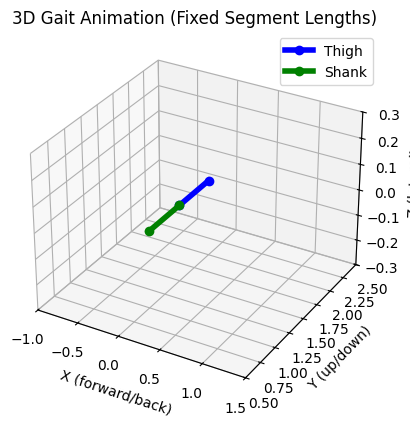

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# ---------------------------
# Parameters
# ---------------------------
frames = 50
t = np.linspace(0, 2*np.pi, frames)

L_thigh = 0.5  # hip -> knee
L_shank = 0.5  # knee -> ankle

# Hip fixed
hip = np.array([0, 2, 0])  # x, y, z

# ---------------------------
# Angles (simulate gait)
# ---------------------------
theta_hip = 0.2 * np.sin(t)    # hip flexion/extension (forward/back)
theta_knee = 0.3 * np.sin(t)   # knee flexion/extension
lateral_sway = 0.1 * np.sin(t) # lateral motion

# ---------------------------
# Precompute joint positions
# ---------------------------
knee_positions = np.zeros((frames, 3))
ankle_positions = np.zeros((frames, 3))

for i in range(frames):
    # Knee position
    knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
    knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
    knee_z = hip[2] + lateral_sway[i]
    knee_positions[i] = [knee_x, knee_y, knee_z]
    
    # Ankle position relative to knee
    ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
    ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
    ankle_z = knee_z + 0.1 * np.sin(t[i])  # small extra lateral for shank
    ankle_positions[i] = [ankle_x, ankle_y, ankle_z]

# ---------------------------
# Setup 3D plot
# ---------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_zlim(-0.3, 0.3)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_zlabel('Z (lateral)')
ax.set_title('3D Gait Animation (Fixed Segment Lengths)')

# ---------------------------
# Line objects for thigh & shank
# ---------------------------
thigh_line, = ax.plot([], [], [], 'o-', lw=4, color='blue', label='Thigh')
shank_line, = ax.plot([], [], [], 'o-', lw=4, color='green', label='Shank')
ax.legend()

# ---------------------------
# Init function
# ---------------------------
def init():
    thigh_line.set_data([], [])
    thigh_line.set_3d_properties([])
    shank_line.set_data([], [])
    shank_line.set_3d_properties([])
    return thigh_line, shank_line

# ---------------------------
# Update function
# ---------------------------
def update(frame):
    # Thigh: hip -> knee
    thigh_line.set_data([hip[0], knee_positions[frame, 0]],
                        [hip[1], knee_positions[frame, 1]])
    thigh_line.set_3d_properties([hip[2], knee_positions[frame, 2]])
    
    # Shank: knee -> ankle
    shank_line.set_data([knee_positions[frame, 0], ankle_positions[frame, 0]],
                        [knee_positions[frame, 1], ankle_positions[frame, 1]])
    shank_line.set_3d_properties([knee_positions[frame, 2], ankle_positions[frame, 2]])
    
    return thigh_line, shank_line

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

# Save as GIF
ani.save("gait3d_fk.gif", writer="pillow", fps=10)

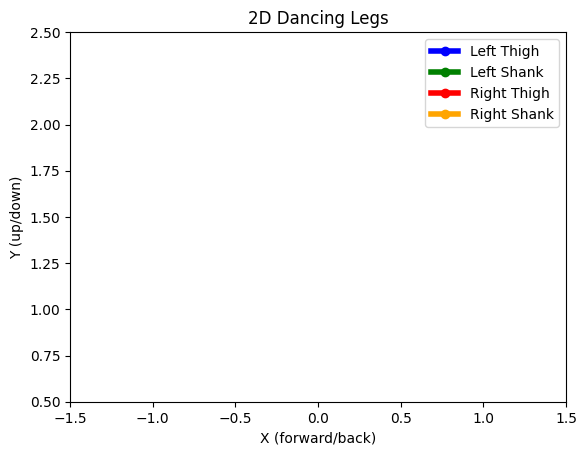

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---------------------------
# Parameters
# ---------------------------
frames = 100
t = np.linspace(0, 2*np.pi, frames)

L_thigh = 0.5  # Hip -> Knee
L_shank = 0.5  # Knee -> Ankle

# Hips fixed (2D)
hip_left = np.array([-0.3, 2])   # Left leg
hip_right = np.array([0.3, 2])   # Right leg

# ---------------------------
# Angles (simulate dancing gait)
# ---------------------------
theta_hip_left = 0.3 * np.sin(t)          # left hip
theta_knee_left = 0.4 * np.sin(t + 0.2)  # left knee (offset phase)

theta_hip_right = 0.3 * np.sin(t + np.pi/2)      # right hip out of phase
theta_knee_right = 0.4 * np.sin(t + np.pi/2 + 0.2)  # right knee

# ---------------------------
# Precompute joint positions
# ---------------------------
def compute_leg_positions(hip, theta_hip, theta_knee):
    frames = len(theta_hip)
    knee_positions = np.zeros((frames, 2))
    ankle_positions = np.zeros((frames, 2))
    for i in range(frames):
        # Knee
        knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
        knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
        knee_positions[i] = [knee_x, knee_y]

        # Ankle
        ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
        ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
        ankle_positions[i] = [ankle_x, ankle_y]
    return knee_positions, ankle_positions

knee_left, ankle_left = compute_leg_positions(hip_left, theta_hip_left, theta_knee_left)
knee_right, ankle_right = compute_leg_positions(hip_right, theta_hip_right, theta_knee_right)

# ---------------------------
# Setup plot
# ---------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_title('2D Dancing Legs')

# Lines
thigh_left, = ax.plot([], [], 'o-', lw=4, color='blue', label='Left Thigh')
shank_left, = ax.plot([], [], 'o-', lw=4, color='green', label='Left Shank')
thigh_right, = ax.plot([], [], 'o-', lw=4, color='red', label='Right Thigh')
shank_right, = ax.plot([], [], 'o-', lw=4, color='orange', label='Right Shank')
ax.legend()

# ---------------------------
# Init function
# ---------------------------
def init():
    for line in [thigh_left, shank_left, thigh_right, shank_right]:
        line.set_data([], [])
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Update function
# ---------------------------
def update(frame):
    # Left leg
    thigh_left.set_data([hip_left[0], knee_left[frame, 0]],
                        [hip_left[1], knee_left[frame, 1]])
    shank_left.set_data([knee_left[frame, 0], ankle_left[frame, 0]],
                        [knee_left[frame, 1], ankle_left[frame, 1]])
    
    # Right leg
    thigh_right.set_data([hip_right[0], knee_right[frame, 0]],
                         [hip_right[1], knee_right[frame, 1]])
    shank_right.set_data([knee_right[frame, 0], ankle_right[frame, 0]],
                         [knee_right[frame, 1], ankle_right[frame, 1]])
    
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

# Save as GIF
ani.save("dancing_legs.gif", writer="pillow", fps=15)

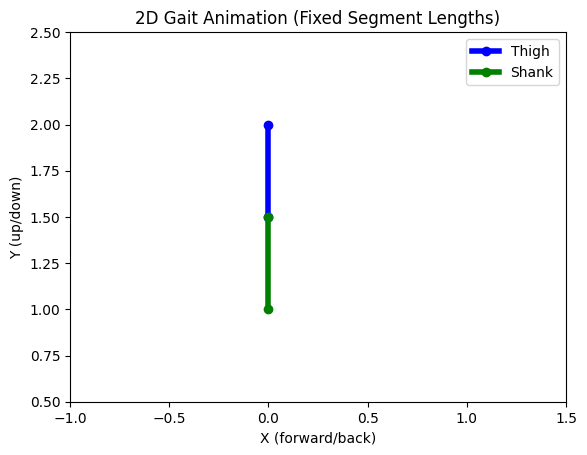

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---------------------------
# Parameters
# ---------------------------
frames = 50
t = np.linspace(0, 2*np.pi, frames)

L_thigh = 0.5  # Hip -> Knee
L_shank = 0.5  # Knee -> Ankle

# Hip fixed (2D)
hip = np.array([0, 2])  # x, y

# ---------------------------
# Angles (simulate gait)
# ---------------------------
theta_hip = 0.2 * np.sin(t)    # hip flexion/extension
theta_knee = 0.3 * np.sin(t)   # knee flexion/extension

# ---------------------------
# Precompute joint positions
# ---------------------------
knee_positions = np.zeros((frames, 2))
ankle_positions = np.zeros((frames, 2))

for i in range(frames):
    # Knee position
    knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
    knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
    knee_positions[i] = [knee_x, knee_y]
    
    # Ankle position relative to knee
    ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
    ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
    ankle_positions[i] = [ankle_x, ankle_y]

# ---------------------------
# Setup 2D plot
# ---------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_title('2D Gait Animation (Fixed Segment Lengths)')

# Line objects for thigh & shank
thigh_line, = ax.plot([], [], 'o-', lw=4, color='blue', label='Thigh')
shank_line, = ax.plot([], [], 'o-', lw=4, color='green', label='Shank')
ax.legend()

# ---------------------------
# Init function
# ---------------------------
def init():
    thigh_line.set_data([], [])
    shank_line.set_data([], [])
    return thigh_line, shank_line

# ---------------------------
# Update function
# ---------------------------
def update(frame):
    # Thigh: hip -> knee
    thigh_line.set_data([hip[0], knee_positions[frame, 0]],
                        [hip[1], knee_positions[frame, 1]])
    
    # Shank: knee -> ankle
    shank_line.set_data([knee_positions[frame, 0], ankle_positions[frame, 0]],
                        [knee_positions[frame, 1], ankle_positions[frame, 1]])
    
    return thigh_line, shank_line

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

# Save as GIF
ani.save("gait2d_fk.gif", writer="pillow", fps=10)

plt.show()


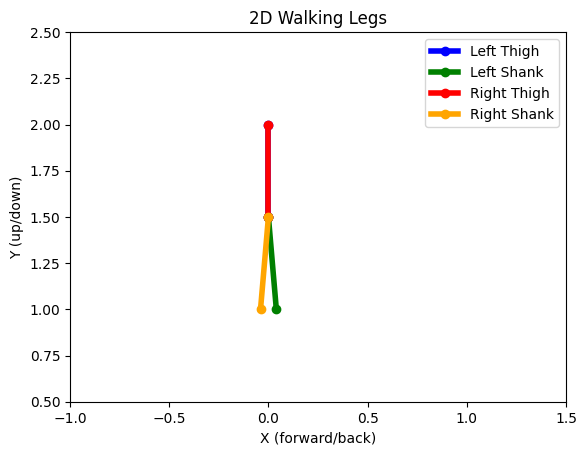

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---------------------------
# Parameters
# ---------------------------
frames = 50
t = np.linspace(0, 2*np.pi, frames)

L_thigh = 0.5  # Hip -> Knee
L_shank = 0.5  # Knee -> Ankle

# Hips fixed (2D)
hip_left = np.array([0, 2])   
hip_right = np.array([0, 2])  


# ---------------------------
# Angles (simulate walking gait)
# ---------------------------
# Walking: opposite phase
theta_hip_left = 0.3 * np.sin(t)          # left hip
theta_knee_left = 0.4 * np.sin(t + 0.2)  # left knee slightly delayed

theta_hip_right = 0.3 * np.sin(t + np.pi)       # right hip opposite phase
theta_knee_right = 0.4 * np.sin(t + np.pi + 0.2)

# ---------------------------
# Precompute joint positions
# ---------------------------
def compute_leg_positions(hip, theta_hip, theta_knee):
    frames = len(theta_hip)
    knee_positions = np.zeros((frames, 2))
    ankle_positions = np.zeros((frames, 2))
    for i in range(frames):
        knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
        knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
        knee_positions[i] = [knee_x, knee_y]

        ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
        ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
        ankle_positions[i] = [ankle_x, ankle_y]
    return knee_positions, ankle_positions

knee_left, ankle_left = compute_leg_positions(hip_left, theta_hip_left, theta_knee_left)
knee_right, ankle_right = compute_leg_positions(hip_right, theta_hip_right, theta_knee_right)

# ---------------------------
# Setup plot
# ---------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_title('2D Walking Legs')

# Lines
thigh_left, = ax.plot([], [], 'o-', lw=4, color='blue', label='Left Thigh')
shank_left, = ax.plot([], [], 'o-', lw=4, color='green', label='Left Shank')
thigh_right, = ax.plot([], [], 'o-', lw=4, color='red', label='Right Thigh')
shank_right, = ax.plot([], [], 'o-', lw=4, color='orange', label='Right Shank')
ax.legend()

# ---------------------------
# Init function
# ---------------------------
def init():
    for line in [thigh_left, shank_left, thigh_right, shank_right]:
        line.set_data([], [])
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Update function
# ---------------------------
def update(frame):
    # Left leg
    thigh_left.set_data([hip_left[0], knee_left[frame, 0]],
                        [hip_left[1], knee_left[frame, 1]])
    shank_left.set_data([knee_left[frame, 0], ankle_left[frame, 0]],
                        [knee_left[frame, 1], ankle_left[frame, 1]])
    
    # Right leg
    thigh_right.set_data([hip_right[0], knee_right[frame, 0]],
                         [hip_right[1], knee_right[frame, 1]])
    shank_right.set_data([knee_right[frame, 0], ankle_right[frame, 0]],
                         [knee_right[frame, 1], ankle_right[frame, 1]])
    
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

# Save as GIF
ani.save("walking_legs.gif", writer="pillow", fps=10)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---------------------------
# Load gait data (hip angles)
# ---------------------------
# Example CSV: columns = time, theta_hip_left, theta_hip_right
data = np.loadtxt('gait_thigh.csv', delimiter=',', skiprows=1)
theta_hip_left = data[:, 1]   # radians
theta_hip_right = data[:, 2]  # radians
frames = len(theta_hip_left)

# ---------------------------
# Parameters
# ---------------------------
L_thigh = 0.5  # Hip -> Knee
L_shank = 0.5  # Knee -> Ankle

hip_left = np.array([0, 2])
hip_right = np.array([0, 2])

# ---------------------------
# For simplicity, knee angles = small constant
# ---------------------------
theta_knee_left = np.zeros(frames)   # or small arbitrary values
theta_knee_right = np.zeros(frames)

# ---------------------------
# Forward kinematics function
# ---------------------------
def compute_leg_positions(hip, theta_hip, theta_knee):
    frames = len(theta_hip)
    knee_positions = np.zeros((frames, 2))
    ankle_positions = np.zeros((frames, 2))
    for i in range(frames):
        knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
        knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
        knee_positions[i] = [knee_x, knee_y]

        ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
        ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
        ankle_positions[i] = [ankle_x, ankle_y]
    return knee_positions, ankle_positions

knee_left, ankle_left = compute_leg_positions(hip_left, theta_hip_left, theta_knee_left)
knee_right, ankle_right = compute_leg_positions(hip_right, theta_hip_right, theta_knee_right)

# ---------------------------
# Setup plot
# ---------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_title('2D Walking Legs from Thigh Data')

thigh_left, = ax.plot([], [], 'o-', lw=4, color='blue', label='Left Thigh')
shank_left, = ax.plot([], [], 'o-', lw=4, color='green', label='Left Shank')
thigh_right, = ax.plot([], [], 'o-', lw=4, color='red', label='Right Thigh')
shank_right, = ax.plot([], [], 'o-', lw=4, color='orange', label='Right Shank')
ax.legend()

# ---------------------------
# Init & Update
# ---------------------------
def init():
    for line in [thigh_left, shank_left, thigh_right, shank_right]:
        line.set_data([], [])
    return thigh_left, shank_left, thigh_right, shank_right

def update(frame):
    thigh_left.set_data([hip_left[0], knee_left[frame, 0]],
                        [hip_left[1], knee_left[frame, 1]])
    shank_left.set_data([knee_left[frame, 0], ankle_left[frame, 0]],
                        [knee_left[frame, 1], ankle_left[frame, 1]])

    thigh_right.set_data([hip_right[0], knee_right[frame, 0]],
                         [hip_right[1], knee_right[frame, 1]])
    shank_right.set_data([knee_right[frame, 0], ankle_right[frame, 0]],
                         [knee_right[frame, 1], ankle_right[frame, 1]])
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

ani.save("gait_thigh_fk.gif", writer="pillow", fps=10)
plt.show()

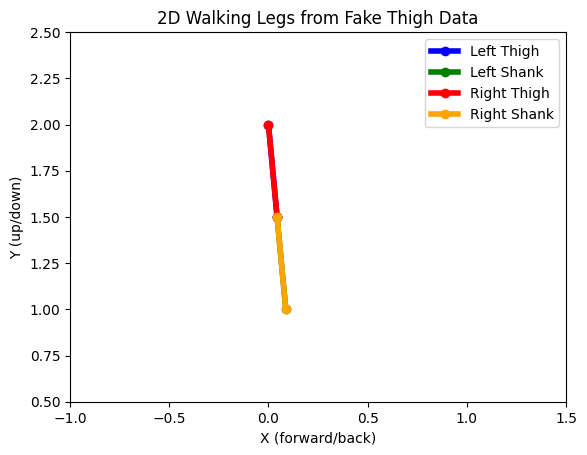

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ---------------------------
# fake data :3
# ---------------------------
frames = 100
t = np.linspace(0, 1, frames)  # 1 second of gait

# Typical hip flexion range in radians (~ -20° to +30°)
deg2rad = np.pi / 180
hip_min = -20 * deg2rad
hip_max = 30 * deg2rad
hip_amplitude = (hip_max - hip_min) / 2
hip_offset = (hip_max + hip_min) / 2

# Left leg: simple sine wave
theta_hip_left = hip_offset + hip_amplitude * np.sin(2 * np.pi * t)

# Right leg: opposite phase
theta_hip_right = hip_offset + hip_amplitude * np.sin(2 * np.pi * t + np.pi)

# ---------------------------
# Parameters
# ---------------------------
L_thigh = 0.5  # Hip -> Knee
L_shank = 0.5  # Knee -> Ankle

hip_left = np.array([0, 2])
hip_right = np.array([0, 2])

# Knee angles = small constant
theta_knee_left = np.zeros(frames)
theta_knee_right = np.zeros(frames)

# ---------------------------
# Forward kinematics function
# ---------------------------
def compute_leg_positions(hip, theta_hip, theta_knee):
    frames = len(theta_hip)
    knee_positions = np.zeros((frames, 2))
    ankle_positions = np.zeros((frames, 2))
    for i in range(frames):
        knee_x = hip[0] + L_thigh * np.sin(theta_hip[i])
        knee_y = hip[1] - L_thigh * np.cos(theta_hip[i])
        knee_positions[i] = [knee_x, knee_y]

        ankle_x = knee_x + L_shank * np.sin(theta_hip[i] + theta_knee[i])
        ankle_y = knee_y - L_shank * np.cos(theta_hip[i] + theta_knee[i])
        ankle_positions[i] = [ankle_x, ankle_y]
    return knee_positions, ankle_positions

knee_left, ankle_left = compute_leg_positions(hip_left, theta_hip_left, theta_knee_left)
knee_right, ankle_right = compute_leg_positions(hip_right, theta_hip_right, theta_knee_right)

# ---------------------------
# Setup plot
# ---------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1, 1.5)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('X (forward/back)')
ax.set_ylabel('Y (up/down)')
ax.set_title('2D Walking Legs from Fake Thigh Data')

thigh_left, = ax.plot([], [], 'o-', lw=4, color='blue', label='Left Thigh')
shank_left, = ax.plot([], [], 'o-', lw=4, color='green', label='Left Shank')
thigh_right, = ax.plot([], [], 'o-', lw=4, color='red', label='Right Thigh')
shank_right, = ax.plot([], [], 'o-', lw=4, color='orange', label='Right Shank')
ax.legend()

# ---------------------------
# Init & Update
# ---------------------------
def init():
    for line in [thigh_left, shank_left, thigh_right, shank_right]:
        line.set_data([], [])
    return thigh_left, shank_left, thigh_right, shank_right

def update(frame):
    thigh_left.set_data([hip_left[0], knee_left[frame, 0]],
                        [hip_left[1], knee_left[frame, 1]])
    shank_left.set_data([knee_left[frame, 0], ankle_left[frame, 0]],
                        [knee_left[frame, 1], ankle_left[frame, 1]])

    thigh_right.set_data([hip_right[0], knee_right[frame, 0]],
                         [hip_right[1], knee_right[frame, 1]])
    shank_right.set_data([knee_right[frame, 0], ankle_right[frame, 0]],
                         [knee_right[frame, 1], ankle_right[frame, 1]])
    return thigh_left, shank_left, thigh_right, shank_right

# ---------------------------
# Animate
# ---------------------------
ani = animation.FuncAnimation(fig, update, frames=frames,
                              init_func=init, blit=False, interval=100)

ani.save("gait_thigh_fk.gif", writer="pillow", fps=10)
